In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
import warnings 

warnings. simplefilter(action = "ignore", category = Warning)

In [2]:
data = pd.read_csv('creditcard.csv')
data = data.sample(frac = 0.1, random_state = 48)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
122954,76755.0,1.436853,-0.917775,0.078092,-1.389748,-1.286173,-1.111520,-0.557917,-0.238104,-2.413720,...,-0.428159,-1.006727,0.145682,0.466701,0.261888,-0.481155,-0.007521,0.011374,40.99,0
250554,154967.0,1.930339,-0.152441,-0.273069,1.589904,-0.437841,-0.298996,-0.268413,0.004709,1.218086,...,-0.523282,-1.205126,0.450719,-0.105540,-0.342146,-1.100933,0.056721,-0.031779,4.94,0
35975,38345.0,-0.187115,0.665522,0.725133,1.362960,-0.275956,0.584166,-0.810736,-2.742715,-0.767029,...,-1.275195,0.099359,-0.233641,-0.440649,0.718448,-0.268951,0.108852,0.275729,150.00,0
32141,36657.0,-1.434282,-0.392867,-1.013297,-3.558139,1.961410,2.662056,-0.615023,0.861393,-2.356527,...,-0.547516,-1.267924,-0.160620,0.944138,-0.032426,-0.660199,-0.075204,-0.020349,18.39,0
49333,44009.0,-0.956350,-4.255127,0.248924,1.895980,-2.619044,0.732871,0.461789,-0.155647,0.161222,...,0.047522,-1.433421,-0.935952,0.457217,0.040259,-0.547200,-0.090028,0.238465,1139.50,0


In [3]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
fraud = data[data.Class == 1]
valid = data[data.Class == 0]
fraud_transc_percentage = (len(fraud)/len(data))*100

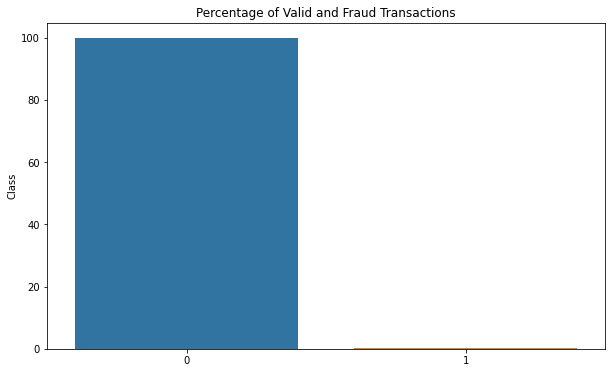

In [5]:
#Ploting the difference between fraud vs valid transation
vf = data["Class"].value_counts(normalize = True)    
fig = plt.figure(figsize=(10,6))
sns.barplot(vf.index, vf*100).set_title("Percentage of Valid and Fraud Transactions")
plt.show()

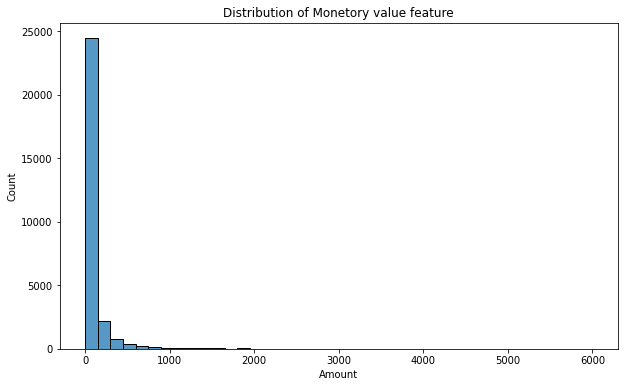

In [6]:
#plpoting the mometory values over time
fig= plt.figure(figsize=(10,6))
sns.histplot(data["Amount"], bins = 40).set_title("Distribution of Monetory value feature")
plt.show()

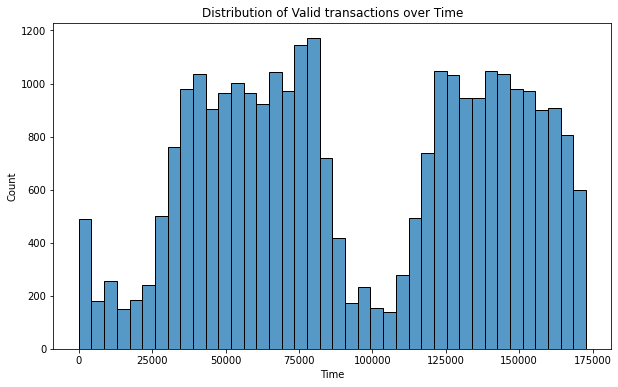

In [7]:
#ploting the distribution of valid transation over time
fig = plt.figure(figsize=(10,6))
sns.histplot(valid["Time"], bins = 40).set_title("Distribution of Valid transactions over Time")
plt.show()

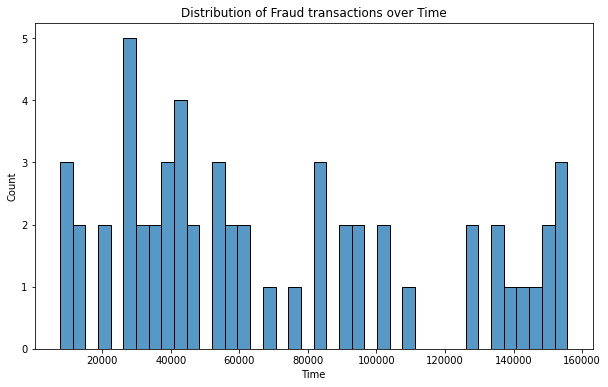

In [8]:
#ploting the distribution of fraud transation over time
fig = plt.figure(figsize=(10,6))
sns.histplot(fraud["Time"], bins = 40).set_title("Distribution of Fraud transactions over Time")
plt.show()

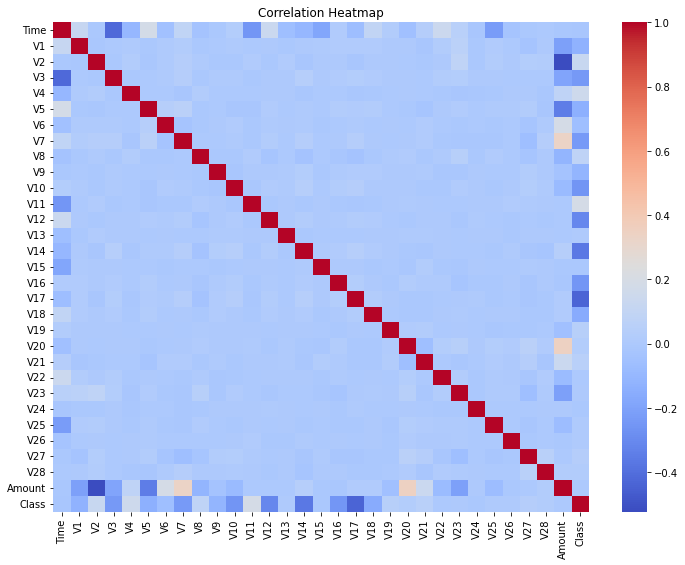

In [9]:
# ploting the corelation matrix of the values in the dataSet
fig =plt.figure(figsize=(12,9))
sns.heatmap(data.corr(), cmap = sns.color_palette("coolwarm", as_cmap = True)).set_title("Correlation Heatmap");
plt.show()

In [10]:
#we can notice that there are not much co-relation between any of the attributes

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
data['Normalized_amount'] = StandardScaler().fit_transform(data.Amount.values.reshape(-1,1))
data = data.drop(['Amount'], axis = 1)

In [13]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Normalized_amount
122954,76755.0,1.436853,-0.917775,0.078092,-1.389748,-1.286173,-1.111520,-0.557917,-0.238104,-2.413720,...,-0.428159,-1.006727,0.145682,0.466701,0.261888,-0.481155,-0.007521,0.011374,0,-0.203274
250554,154967.0,1.930339,-0.152441,-0.273069,1.589904,-0.437841,-0.298996,-0.268413,0.004709,1.218086,...,-0.523282,-1.205126,0.450719,-0.105540,-0.342146,-1.100933,0.056721,-0.031779,0,-0.357264
35975,38345.0,-0.187115,0.665522,0.725133,1.362960,-0.275956,0.584166,-0.810736,-2.742715,-0.767029,...,-1.275195,0.099359,-0.233641,-0.440649,0.718448,-0.268951,0.108852,0.275729,0,0.262369
32141,36657.0,-1.434282,-0.392867,-1.013297,-3.558139,1.961410,2.662056,-0.615023,0.861393,-2.356527,...,-0.547516,-1.267924,-0.160620,0.944138,-0.032426,-0.660199,-0.075204,-0.020349,0,-0.299812
49333,44009.0,-0.956350,-4.255127,0.248924,1.895980,-2.619044,0.732871,0.461789,-0.155647,0.161222,...,0.047522,-1.433421,-0.935952,0.457217,0.040259,-0.547200,-0.090028,0.238465,0,4.489083


In [14]:
X = data.drop(['Class'], axis = 1)
y = data.Class

In [15]:
X.shape

(28481, 30)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [17]:
y_train.shape,y_train.shape

((19936,), (19936,))

In [18]:
y_test.shape

(8545,)

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
random_forest = RandomForestClassifier()

In [21]:
random_forest.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

In [22]:
y_pred = random_forest.predict(X_test)

In [28]:
score = random_forest.score(X_test,y_test)
print(score*100)

99.91808074897601


In [24]:
pickle.dump(random_forest,open('random_forest.plk','wb'))

In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [26]:
def compute_performance(model, X_train, y_train, X_test, y_test):
   model.fit(X_train, y_train)
   Y_pred = model.predict(X_test)
   
  
   
   accuracy = random_forest.score(X_test,y_test)
   'Accuracy: ', accuracy
   
   "Confusion Matrix: "
   cm = confusion_matrix(y_test, y_pred)
   
   group_names = ['True Neg','True Pos','False Neg','False Pos']
   group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
   group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
   labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
   labels = np.asarray(labels).reshape(2,2)
   
   fig = plt.figure(figsize = (13,10))
   sns.heatmap(cm, annot=labels, fmt="", cmap='Reds')
   plt.show()

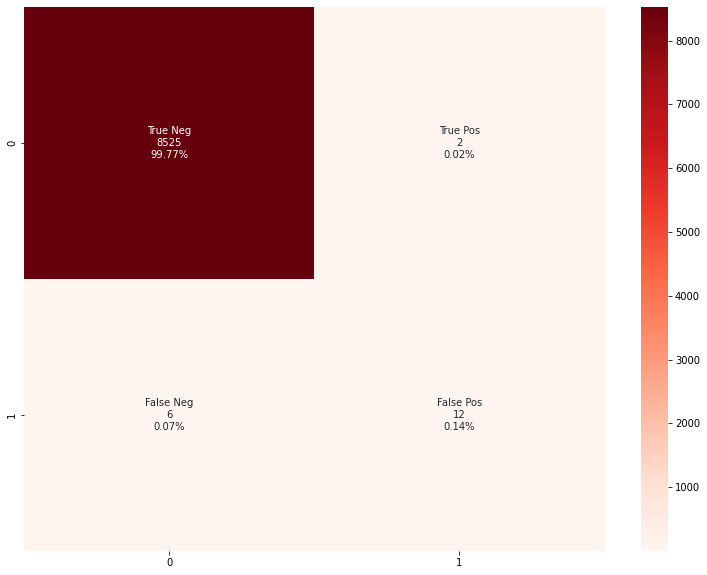

In [27]:
compute_performance(random_forest, X_train, y_train, X_test, y_test)